In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix,classification_report

In [26]:
df = pd.read_csv("/content/heart_failure_clinical_records.csv")
df.sample(7)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
2019,70.0,0,582,0,40,0,51000.0,2.7,136,1,1,250,0
3833,46.0,1,291,0,35,0,348000.0,0.9,140,0,0,109,0
1566,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
908,80.0,1,1807,0,35,1,388000.0,9.4,133,1,1,10,1
814,72.0,0,211,1,25,0,318000.0,1.2,134,0,0,207,0
3135,50.0,0,369,1,25,0,252000.0,1.6,136,1,0,90,0
19,60.0,1,47,1,20,0,336000.0,0.7,139,1,0,73,1


In [27]:
len(df)

5000

In [28]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [29]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [30]:
df.nunique()

age                          48
anaemia                       2
creatinine_phosphokinase    290
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   203
serum_creatinine             43
serum_sodium                 27
sex                           2
smoking                       2
time                        155
DEATH_EVENT                   2
dtype: int64

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5000.0,60.288736,11.697243,40.0,50.0,60.00,68.0,95.0
anaemia,5000.0,0.474400,0.499394,0.0,0.0,0.00,1.0,1.0
creatinine_phosphokinase,5000.0,586.760600,976.733979,23.0,121.0,248.00,582.0,7861.0
diabetes,5000.0,0.439400,0.496364,0.0,0.0,0.00,1.0,1.0
ejection_fraction,5000.0,37.734600,11.514855,14.0,30.0,38.00,45.0,80.0
high_blood_pressure,5000.0,0.364800,0.481422,0.0,0.0,0.00,1.0,1.0
platelets,5000.0,265075.404370,97999.758622,25100.0,215000.0,263358.03,310000.0,850000.0
serum_creatinine,5000.0,1.369106,1.009750,0.5,0.9,1.10,1.4,9.4
serum_sodium,5000.0,136.808200,4.464236,113.0,134.0,137.00,140.0,148.0
sex,5000.0,0.645600,0.478379,0.0,0.0,1.00,1.0,1.0


In [32]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [33]:
(df.duplicated().sum())/len(df)*100

73.6

In [34]:
df[df.duplicated()].head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
18,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
51,45.0,0,308,0,40,1,51000.0,1.3,136,1,1,186,0
58,60.0,0,582,0,40,0,242000.0,3.7,134,1,0,96,1
65,60.0,0,582,0,40,0,242000.0,3.7,134,1,0,96,1
81,45.0,0,615,1,55,0,236000.0,0.8,141,0,0,257,0


In [35]:
df.count().values

array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000,
       5000, 5000])

In [36]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
creatinine_phosphokinase,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
ejection_fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
high_blood_pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
serum_creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
serum_sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


In [37]:
df_removed_duplicated = df.drop_duplicates()
df_removed_duplicated.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [38]:
df_removed_duplicated.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4731    False
4855    False
4862    False
4965    False
4972    False
Length: 1320, dtype: bool

In [39]:
len(df_removed_duplicated)

1320

In [40]:
df_removed_duplicated.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.108039,-0.098890,-0.077437,0.057771,0.122868,-0.009855,0.197325,-0.044933,0.059648,0.022495,-0.198010,0.224602
anaemia,0.108039,1.000000,-0.200294,0.031989,0.024339,0.047177,-0.006089,0.003655,-0.003755,-0.037188,-0.056350,-0.097733,0.063510
creatinine_phosphokinase,-0.098890,-0.200294,1.000000,-0.042517,0.002157,-0.004945,0.015418,-0.018248,0.047212,0.061105,-0.002144,0.019553,0.055221
diabetes,-0.077437,0.031989,-0.042517,1.000000,0.012477,-0.038261,0.044104,-0.063715,-0.095644,-0.149128,-0.222771,0.008653,-0.001485
ejection_fraction,0.057771,0.024339,0.002157,0.012477,1.000000,0.049202,0.083884,-0.060202,0.194937,-0.143921,0.002126,0.086484,-0.271767
high_blood_pressure,0.122868,0.047177,-0.004945,-0.038261,0.049202,1.000000,-0.004260,0.013098,0.037283,-0.065553,-0.078545,-0.219173,0.113721
platelets,-0.009855,-0.006089,0.015418,0.044104,0.083884,-0.004260,1.000000,0.023062,0.065051,-0.090300,0.043759,-0.001018,-0.044523
serum_creatinine,0.197325,0.003655,-0.018248,-0.063715,-0.060202,0.013098,0.023062,1.000000,-0.263781,0.037234,0.020209,-0.165679,0.290229
serum_sodium,-0.044933,-0.003755,0.047212,-0.095644,0.194937,0.037283,0.065051,-0.263781,1.000000,-0.047862,0.011111,0.130820,-0.250990
sex,0.059648,-0.037188,0.061105,-0.149128,-0.143921,-0.065553,-0.090300,0.037234,-0.047862,1.000000,0.411603,0.017673,0.044045


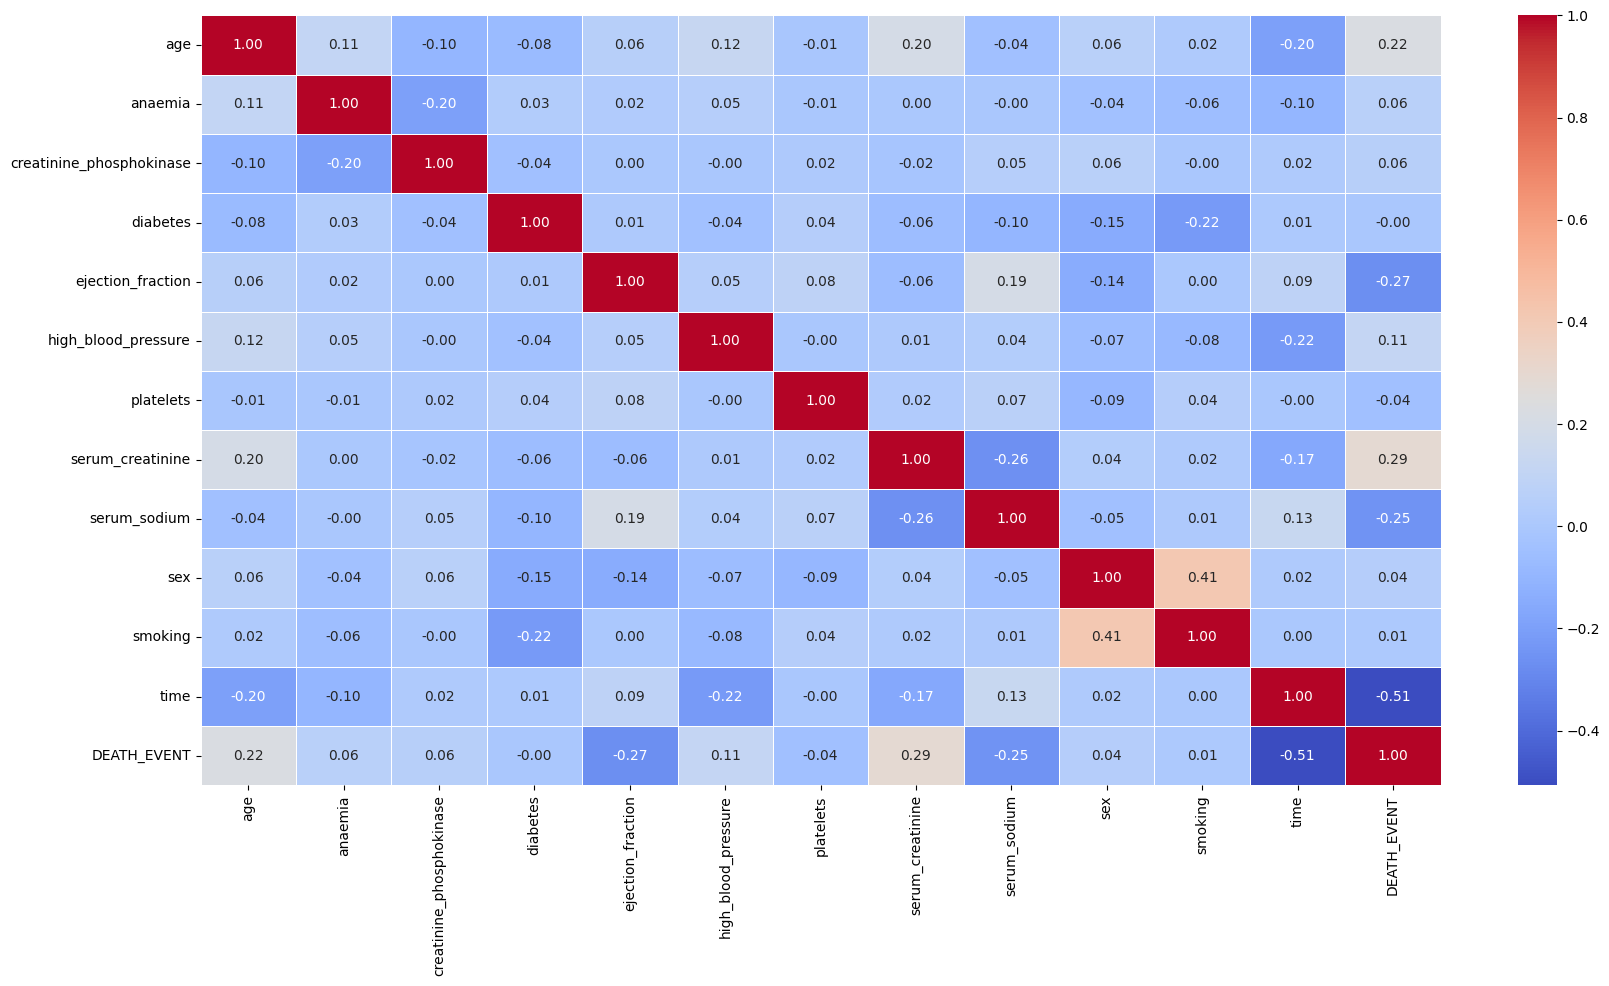

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df_removed_duplicated.corr(),annot=True, cmap='coolwarm' , fmt=".2f" ,linewidths=0.5)
plt.show()

In [42]:
df_removed_duplicated["DEATH_EVENT"].value_counts().mean()

660.0

In [43]:
X = df_removed_duplicated.iloc[: , :-1]
y = df_removed_duplicated.iloc[ : , -1]


In [44]:
X_train,X_test,y_train,y_test = train_test_split( X,y,test_size=0.2,random_state=42)

In [45]:
# Créer un classificateur de forêt aléatoire
#model = RandomForestClassifier()

#Créer un objet DMatrix pour XGBoost
"""dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Définir les paramètres du modèle XGBoost
params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3
}

# Entraîner le modèle XGBoost
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(dtest) """


# Créer un classificateur SVM
#model = SVC()

# Créer un classificateur de régression logistique
#model = LogisticRegression()

# Créer un classificateur k-NN avec k=3
#model = KNeighborsClassifier(n_neighbors=3)

# Créer un classificateur naïf bayésien gaussien
model = GaussianNB()


In [46]:
def training_evalute(model):

  # Entraîner le classificateur sur les données d'entraînement
  model.fit(X_train, y_train)

  # Faire des prédictions sur les données de test
  predictions = model.predict(X_test)

  report = classification_report(y_test, predictions)
  print(report)

  # Calcul de l'aire sous la courbe ROC (AUC-ROC)
  auc_roc = roc_auc_score(y_test, predictions)

  # Calcul de la courbe ROC
  fpr, tpr, thresholds = roc_curve(y_test, predictions)

  # Création de la matrice de confusion
  conf_matrix = confusion_matrix(y_test, predictions)

  print("AUC-ROC:", auc_roc)
  print("Matrice de confusion:\n", conf_matrix)


In [47]:
training_evalute(GaussianNB())

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       194
           1       0.70      0.54      0.61        70

    accuracy                           0.82       264
   macro avg       0.78      0.73      0.75       264
weighted avg       0.81      0.82      0.81       264

AUC-ROC: 0.7301914580265095
Matrice de confusion:
 [[178  16]
 [ 32  38]]


In [48]:
training_evalute(SVC())

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       194
           1       0.00      0.00      0.00        70

    accuracy                           0.73       264
   macro avg       0.37      0.50      0.42       264
weighted avg       0.54      0.73      0.62       264

AUC-ROC: 0.5
Matrice de confusion:
 [[194   0]
 [ 70   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
training_evalute(LogisticRegression())

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       194
           1       0.65      0.60      0.62        70

    accuracy                           0.81       264
   macro avg       0.75      0.74      0.75       264
weighted avg       0.80      0.81      0.80       264

AUC-ROC: 0.7407216494845361
Matrice de confusion:
 [[171  23]
 [ 28  42]]


In [53]:
training_evalute(KNeighborsClassifier(n_neighbors=3))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       194
           1       0.54      0.57      0.56        70

    accuracy                           0.76       264
   macro avg       0.69      0.70      0.69       264
weighted avg       0.76      0.76      0.76       264

AUC-ROC: 0.6980854197349042
Matrice de confusion:
 [[160  34]
 [ 30  40]]


In [54]:
training_evalute(KNeighborsClassifier(n_neighbors=5))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       194
           1       0.49      0.47      0.48        70

    accuracy                           0.73       264
   macro avg       0.65      0.65      0.65       264
weighted avg       0.73      0.73      0.73       264

AUC-ROC: 0.6480854197349043
Matrice de confusion:
 [[160  34]
 [ 37  33]]


In [55]:
params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3
}
model=xgb.XGBRFClassifier(**params)
training_evalute(model)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       194
           1       0.78      0.76      0.77        70

    accuracy                           0.88       264
   macro avg       0.85      0.84      0.84       264
weighted avg       0.88      0.88      0.88       264

AUC-ROC: 0.8399116347569956
Matrice de confusion:
 [[179  15]
 [ 17  53]]


In [56]:
params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3
}
model=xgb.XGBClassifier(**params)
training_evalute(model)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       194
           1       0.89      0.84      0.87        70

    accuracy                           0.93       264
   macro avg       0.92      0.90      0.91       264
weighted avg       0.93      0.93      0.93       264

AUC-ROC: 0.9033873343151694
Matrice de confusion:
 [[187   7]
 [ 11  59]]


In [57]:
training_evalute(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       194
           1       0.94      0.89      0.91        70

    accuracy                           0.95       264
   macro avg       0.95      0.93      0.94       264
weighted avg       0.95      0.95      0.95       264

AUC-ROC: 0.9325478645066273
Matrice de confusion:
 [[190   4]
 [  8  62]]


f1score,accuracy
1-99 et 99

2-95 et 97

3-0 et 70

4-69 et 82

5-89 et 94

6-61 et 82

Il existe plusieurs métriques de classification pour évaluer un modèle. Voici quelques-unes des plus couramment utilisées :

1. **Précision (Precision)** : C'est le nombre de vrais positifs divisé par le nombre total de prédictions positives (vrais positifs + faux positifs). Elle mesure la précision du modèle lorsqu'il prédit une classe positive.

2. **Rappel (Recall ou Sensibilité)** : C'est le nombre de vrais positifs divisé par le nombre total d'instances de la classe réelle. Il mesure la capacité du modèle à identifier correctement toutes les instances de la classe positive.

3. **F1-score** : C'est la moyenne harmonique de la précision et du rappel. Il offre une balance entre la précision et le rappel.

4. **Exactitude (Accuracy)** : C'est le nombre total de prédictions correctes divisé par le nombre total de prédictions. Elle mesure la capacité globale du modèle à prédire correctement toutes les classes.

5. **Score F-Bêta** : C'est une généralisation du F1-score qui permet de donner plus de poids soit à la précision (avec β < 1), soit au rappel (avec β > 1).

6. **Courbe ROC (Receiver Operating Characteristic)** : Elle représente la performance du modèle en traçant le taux de vrais positifs (TPR) en fonction du taux de faux positifs (FPR) pour différents seuils de classification.

7. **AUC-ROC (Area Under the ROC Curve)** : C'est l'aire sous la courbe ROC. Elle donne une mesure agrégée de la performance du modèle sur tous les seuils de classification.

8. **Matrice de confusion** : Elle montre le nombre de prédictions correctes et incorrectes effectuées par le modèle par classe. Elle est utile pour comprendre où le modèle se trompe le plus.

Chaque métrique a ses propres avantages et limitations, et le choix dépend souvent du contexte spécifique du problème de classification et des préférences en matière de performance.